# Dados Utilizados

Utilizamos dados da billboard e do spotify para fazer uma análise das músicas mais populares.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Tratando os dados

Começamos selecionando as colunas que vamos usar e depois filtrando as linhas que possuem dados faltantes.

In [2]:
songs = pd.read_csv('../dataset/billboard_2000_2018_spotify_lyrics.csv',
                 encoding='iso-8859-1', na_values='unknown')

songs = songs[['date', 'title', 'artist', 'peak_pos', 'last_pos', 'weeks', 'rank', 'genre', 'energy', 'liveness', 'tempo', 'speechiness', 'acousticness', 'instrumentalness', 'time_signature', 'danceability', 'key','duration_ms', 'loudness', 'valence', 'mode']]

# Removendo na
songs = songs.dropna()

In [3]:
songs.head()

,date,title,artist,peak_pos,last_pos,weeks,rank,genre,energy,liveness,...,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
1,6/21/18,All Girls Are The Same,Juice WRLD,41,49,5,41,[u'rap'],0.529,0.0856,...,0.3070,0.0769,0.000335,4.0,0.671,0.0,165820.0,-7.226,0.203,1.0
2,6/21/18,All Mine,Kanye West,11,11,2,31,"[u'pop rap', u'rap']",0.308,0.0933,...,0.3380,0.1250,0.000000,4.0,0.925,11.0,145507.0,-6.562,0.265,0.0
5,6/21/18,Back To You,Selena Gomez,22,31,5,22,"[u'dance pop', u'pop', u'post-teen pop']",0.724,0.1200,...,0.0486,0.0945,0.000002,4.0,0.601,6.0,207905.0,-4.856,0.508,1.0
7,6/21/18,Be Careful,Cardi B,11,25,11,23,"[u'pop', u'rap']",0.568,0.0952,...,0.4110,0.0256,0.000000,4.0,0.820,6.0,210787.0,-8.230,0.535,0.0
8,6/21/18,Beautiful Crazy,Luke Combs,58,77,4,93,"[u'contemporary country', u'country road']",0.402,0.0928,...,0.0262,0.6760,0.000000,4.0,0.552,11.0,193200.0,-7.431,0.382,1.0


Podemos observar que os gêneros não estão processáveis. Como faremos uma análise de gênero, será importante que eles estejam padronizados. Assim, vamos realizar um one-hot encoding dos gêneros mais relevantes.

In [4]:
#transforma gêneros para formato de lista
genres_list = []

for value in songs['genre'].values:
    value = value.replace("u'", "")
    value = value.replace("'", "")
    value = value.replace("[", "")
    value = value.replace("]", "")
    
    song_genres = value.split(", ")
    genres = []
    
    for genre in song_genres:
        if genre or genre.strip():
            genres.append(genre)
            
    
    genres_list.append(genres)

songs_with_genres = songs.copy()
    
songs_with_genres['genre'] = genres_list
songs_with_genres

,date,title,artist,peak_pos,last_pos,weeks,rank,genre,energy,liveness,...,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
1,6/21/18,All Girls Are The Same,Juice WRLD,41,49,5,41,[rap],0.529,0.0856,...,0.3070,0.076900,0.000335,4.0,0.671,0.0,165820.0,-7.226,0.2030,1.0
2,6/21/18,All Mine,Kanye West,11,11,2,31,"[pop rap, rap]",0.308,0.0933,...,0.3380,0.125000,0.000000,4.0,0.925,11.0,145507.0,-6.562,0.2650,0.0
5,6/21/18,Back To You,Selena Gomez,22,31,5,22,"[dance pop, pop, post-teen pop]",0.724,0.1200,...,0.0486,0.094500,0.000002,4.0,0.601,6.0,207905.0,-4.856,0.5080,1.0
7,6/21/18,Be Careful,Cardi B,11,25,11,23,"[pop, rap]",0.568,0.0952,...,0.4110,0.025600,0.000000,4.0,0.820,6.0,210787.0,-8.230,0.5350,0.0
8,6/21/18,Beautiful Crazy,Luke Combs,58,77,4,93,"[contemporary country, country road]",0.402,0.0928,...,0.0262,0.676000,0.000000,4.0,0.552,11.0,193200.0,-7.431,0.3820,1.0
9,6/21/18,Better Now,Post Malone,7,34,7,20,"[pop, rap]",0.563,0.1360,...,0.0454,0.354000,0.000000,4.0,0.680,10.0,231267.0,-5.843,0.3740,1.0
11,6/21/18,Boo'd Up,Ella Mai,6,6,11,7,"[dance pop, indie r&b, pop, r&b, urban contemp...",0.779,0.0780,...,0.0531,0.086200,0.000000,4.0,0.561,10.0,256064.0,-5.107,0.2350,0.0
12,6/21/18,Call Out My Name,The Weeknd,4,52,11,54,"[canadian pop, pop, rap]",0.599,0.3270,...,0.0369,0.211000,0.000000,3.0,0.449,1.0,228373.0,-4.892,0.1650,1.0
13,6/21/18,Chun-Li,Nicki Minaj,10,46,10,43,"[dance pop, hip pop, pop, pop rap, rap]",0.766,0.1070,...,0.3840,0.307000,0.000014,4.0,0.643,6.0,191606.0,-4.788,0.4630,0.0
14,6/21/18,Cudi Montage,KIDS SEE GHOSTS,69,0,1,69,"[hip hop, pop, pop rap, rap]",0.504,0.1210,...,0.0321,0.401000,0.000001,4.0,0.729,8.0,197001.0,-6.784,0.3050,0.0


In [5]:
#recupera gêneros únicos

def get_unique_genres(songs):
    unique_genres = {}
      
    for genres in songs['genre']:
        for genre in genres:
            if genre in unique_genres:
                unique_genres[genre] += 1
            else:
                unique_genres[genre] = 1
    
    unique_genres = pd.DataFrame.from_dict(unique_genres, orient='index')
    unique_genres.sort_values(by=0, ascending=False, inplace=True)
    unique_genres.reset_index(level=0, inplace=True)
    unique_genres.columns = ['genre', 'quantity']
    
    return unique_genres

unique_genres = get_unique_genres(songs_with_genres)
unique_genres

,genre,quantity
0,pop,3114
1,dance pop,2685
2,pop rap,2201
3,rap,1828
4,post-teen pop,1563
5,hip hop,1335
6,r&b,1326
7,contemporary country,1252
8,southern hip hop,1188
9,country,1154


Fazendo a análise dos gêneros, podemos observar que muitos deles tem poucas músicas no Top 100. Isso é mostrado no histograma:

(array([366.,   7.,   3.,   6.,   3.,   2.,   0.,   1.,   1.,   1.]),
 array([1.0000e+00, 3.1230e+02, 6.2360e+02, 9.3490e+02, 1.2462e+03,
        1.5575e+03, 1.8688e+03, 2.1801e+03, 2.4914e+03, 2.8027e+03,
        3.1140e+03]),
 <a list of 10 Patch objects>)

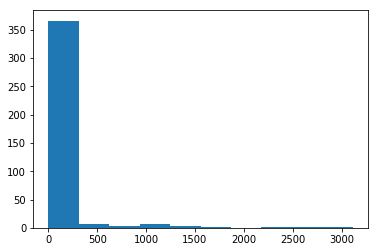

In [6]:
plt.hist(unique_genres['quantity'])

Assim, vamos criar uma lista apenas com os gêneros relevantes a partir de um número arbitrário, definido como pelo menos 5% da quantidade original de músicas.

In [7]:
def get_relevant_genres(songs, unique_genres):
    unique_genres.sort_values(by='quantity', ascending=False, inplace=True)
    return unique_genres[unique_genres['quantity'] >= songs.shape[0]*0.05]

relevant_genres = get_relevant_genres(songs_with_genres, unique_genres)
relevant_genres

,genre,quantity
0,pop,3114
1,dance pop,2685
2,pop rap,2201
3,rap,1828
4,post-teen pop,1563
5,hip hop,1335
6,r&b,1326
7,contemporary country,1252
8,southern hip hop,1188
9,country,1154


De posse dos nossos gêneros relevantes, conseguimos fazer o one-hot encoding da tabela.

In [8]:
#retorna lista de one-encoding por gênero
def genre_one_hot_encoding(songs_with_genres, genre):
    one_hot_encoding = songs_with_genres.genre.map(set([genre]).issubset)
    return list(one_hot_encoding.map({False:0, True:1}))

In [9]:
#itera sobre os gêneros adicionando colunas ao nosso dataframe de músicas para tratá-los como dados classificatórios
def one_hot_encoding(songs_with_genres, relevant_genres):  
    songs_one_hot_encoding = songs_with_genres[['peak_pos', 'weeks', 'rank', 'genre']]

    for i in range(relevant_genres.shape[0]):
        songs_one_hot_encoding.insert(i+4, relevant_genres['genre'][i], genre_one_hot_encoding(songs_with_genres, relevant_genres['genre'][i]))

    return songs_one_hot_encoding 

songs_one_hot_encoding = one_hot_encoding(songs_with_genres, relevant_genres)
songs_one_hot_encoding

,peak_pos,weeks,rank,genre,pop,dance pop,pop rap,rap,post-teen pop,hip hop,...,urban contemporary,trap music,hip pop,dirty south rap,pop rock,modern country rock,gangster rap,neo mellow,neo soul,post-grunge
1,41,5,41,[rap],0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11,2,31,"[pop rap, rap]",0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,22,5,22,"[dance pop, pop, post-teen pop]",1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,11,11,23,"[pop, rap]",1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,58,4,93,"[contemporary country, country road]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,7,7,20,"[pop, rap]",1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11,6,11,7,"[dance pop, indie r&b, pop, r&b, urban contemp...",1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12,4,11,54,"[canadian pop, pop, rap]",1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13,10,10,43,"[dance pop, hip pop, pop, pop rap, rap]",1,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
14,69,1,69,"[hip hop, pop, pop rap, rap]",1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


## Explorando os dados

Agora, conseguimos realizar operações sobre o nosso dataset para visualizar estatísticas por gênero.

In [10]:
#agrupa por gênero para tirar estatísticas

def group_by_genre(relevant_genres, songs_one_hot_encoding):
    genre_stats = {}
    for i in range(relevant_genres.shape[0]):
        genres = relevant_genres.iloc[i]['genre']
        df_genres = songs_one_hot_encoding[['peak_pos', 'weeks', 'rank', genres]]
        group_genre = df_genres[df_genres[genres] == True]
        group_genre = group_genre.mean()[['peak_pos', 'weeks', 'rank']]

        genre_stats[genres] = group_genre

    return pd.DataFrame.from_dict(genre_stats, orient='index')

genre_stats = group_by_genre(relevant_genres, songs_one_hot_encoding)
genre_stats

,peak_pos,weeks,rank
contemporary country,50.824281,15.753994,81.789137
country,50.308492,16.003466,82.419411
country road,50.912078,15.943162,82.215808
dance pop,40.623836,14.080819,71.757914
dirty south rap,46.360778,13.711078,76.851796
gangster rap,48.258333,13.180000,78.558333
hip hop,46.922097,12.519101,76.298127
hip pop,40.816857,15.969823,75.122789
modern country rock,54.047771,15.581210,82.821656
neo mellow,44.609053,17.162551,72.960905


In [16]:
genre_stats.sort_values(by='peak_pos')

,peak_pos,weeks,rank
r&b,39.892157,15.884615,73.469080
urban contemporary,40.230843,15.851533,74.700192
dance pop,40.623836,14.080819,71.757914
hip pop,40.816857,15.969823,75.122789
post-teen pop,41.799104,12.564299,70.654511
pop,43.246949,13.445087,71.406230
pop rock,43.919877,17.137134,74.556240
neo mellow,44.609053,17.162551,72.960905
pop rap,44.671513,13.832349,74.493412
dirty south rap,46.360778,13.711078,76.851796


Assim, ao ordenar o agrupamento, podemos ver que r&b, urban contemporary, dance pop, hip hop e post-teen pop atingem em média posições superiores em relação a contemporary country, country road, post-grunge, trap music e modern country rock.

Agora, precisamos analisar se essas informações são ou não determinísticos. Vamos começar analisando a amostra das músicas que atingiram as 10 primeiras posições do ranking.

In [17]:
top_10 = songs_one_hot_encoding[songs_one_hot_encoding['peak_pos'] < 11]
top_10_one_hot_encoding = one_hot_encoding(top_10, relevant_genres)

top_10_genre_stats = group_by_genre(relevant_genres, top_10_one_hot_encoding)
top_10_genre_stats

,peak_pos,weeks,rank
contemporary country,5.857143,34.761905,56.095238
country,5.947368,33.421053,56.789474
country road,5.769231,39.769231,47.230769
dance pop,4.474085,26.321646,49.211890
dirty south rap,4.813008,24.056911,48.813008
gangster rap,4.881188,23.990099,51.069307
hip hop,4.512605,24.516807,50.802521
hip pop,4.343891,25.773756,49.162896
modern country rock,4.000000,54.000000,50.000000
neo mellow,5.128571,37.314286,48.000000


In [18]:
top_10_genre_stats.sort_values(by='peak_pos')

,peak_pos,weeks,rank
modern country rock,4.000000,54.000000,50.000000
urban contemporary,4.184211,25.744361,49.003759
r&b,4.256637,26.430678,49.412979
hip pop,4.343891,25.773756,49.162896
pop,4.451852,27.600000,48.025185
post-teen pop,4.469444,26.780556,50.094444
dance pop,4.474085,26.321646,49.211890
hip hop,4.512605,24.516807,50.802521
pop rap,4.523918,26.066059,48.250569
rap,4.677632,24.506579,48.914474


Observamos aqui certa semelhança com o dataframe quando tratado em sua interidade. Músicas que contém o estilo r&b, urban contemporary e hip hop também atingiram posições mais altas no ranking.

Assim, vamos analisar com maior propriedade se as músicas que atingem as posições mais altas realmente tem gêneros em comum ou se isso pode ser explicado pelo acaso nos testes de hipótese e intervalo de confiança.

In [14]:
#salvando os dados tratados
songs_with_genres.to_csv('../dataset/songs_with_genre.csv', index=False)
songs_one_hot_encoding.to_csv('../dataset/songs_one_hot_encoding.csv', index=False)
relevant_genres.to_csv('../dataset/genres_relevant.csv', index=False)